# Problema 3

En este ejercicio se quiere estudiar la distribución de tipos morfológicos de la muestra obtenida de galaxias, particularmete se busca determinar si la misma es consistente con una distribución uniforme.

In [1]:
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns
from scipy import stats as st

In [2]:
sns.set()

Primero se comienza exportando qué tipo de galaxia es cada objeto de la muestra. El tipo morfológico está determinado por 2 columnas: espirales y elípticas. Cuando un objeto es tipo espiral se obtiene un 1 en la columna espiral y un 0 en la de las elípticas. Si el objeto es elíptico ocurre al reves.

Para realizarlo, solo se exporta la columna de las espirales ya que si su valor es 1 efectivamente el objeto es una galaxia espiral, mientras que si es 0 no tiene otra opción de ser una galaxia elíptica.

In [3]:
# espirales
n_espi= np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=1) 


Se grafica la distribución obtenida de tipos morfológicos en rosa, mientras que en verde se ve la distribución uniforme con la que se quiere comparar.

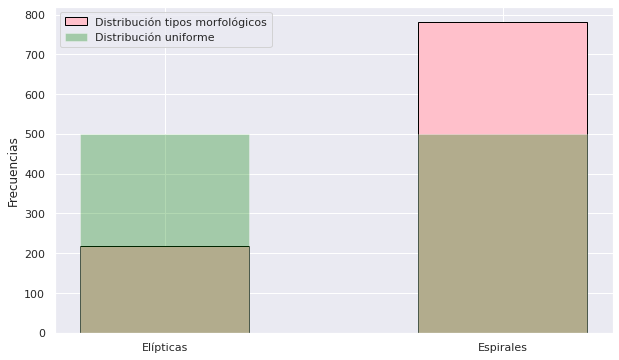

In [4]:
plt.figure(figsize=(10,6))

n = plt.hist(n_espi, bins=[-0.5,0.5,1.5], rwidth=0.5, color='pink', ec='black', label='Distribución tipos morfológicos')
plt.bar([0,1], [500,500], width=0.5, color='green', alpha=0.3, label='Distribución uniforme')

#el valor 1 son las galaxias espirales y el 0 las elípticas
plt.xticks([0,1], ['Elípticas', 'Espirales'])
plt.ylabel('Frecuencias')
plt.legend(loc='upper left')
plt.show()

In [5]:
#cantidad de galaxias de cada tipo--> n[0]
print('Cantidad total de galaxias:', len(n_espi))
print('Cantidad de galaxias elíticas:', n[0][0])
print('Cantidad de galaxias espirales:', n[0][1])

Cantidad total de galaxias: 1000
Cantidad de galaxias elíticas: 219.0
Cantidad de galaxias espirales: 781.0


A simple vista se ve que la distribución obtenida no es uniforme. Sin embargo se realiza una prueba de hipótesis para corroborar esto.

### 1. Hipótesis

$H_0$ = la muestra sigue la distribución de probabilidad uniforme.

$H_1$ = la muestra no sigue la distribución de probabilidad uniforme.

### 2. Nivel de significación: 
$\alpha = 0.05$

### 3. Estadı́stico de prueba:

En este caso como se tienen 2 clases, es una variable aleatoria categórica, por lo que se puede utilizar el estadístico chi-cuadrado:

$$ \chi^2 = \sum_i \frac{(f_{obser,i} - f_{teo,i})^2}{f_{teo,i}}$$

donde $f_{obser,i}$ es la frecuencia absoluta observada, y $f_{teo,i}$ de la distribución uniforme teórica.

### 4. Zona de aceptación:

Zona de aceptación: $\chi^2 < \chi_{(1-\alpha);gl}^2$

Zona de rechazo: $\chi^2 > \chi_{(1-\alpha);gl}^2$

donde $\alpha$ es el nivel de significación y $gl$ los grados de libertad.

### 5. Computos necesarios

In [6]:
#calculo de chi-cuadrado
chi2= ((n[0][0]- 500)**2)/500 + ((n[0][1]- 500)**2)/500
print(chi2)

315.844


Valor crítico de chi-cuadrado:

$$1-\alpha = 0.95$$

$$gl= Num\ de\ bines - 1 = 2 -1 = 1$$

Se busca en las tablas de probabilidad de $\chi^2$, encontrando que:

$$\chi_{(1-\alpha);gl}^2 = \chi_{crit}^2 = 3.84$$

### 6. Decisión

Se puede ver que:  $\chi_{crit}^2 < \chi^2 $, por lo que el estadı́stico de prueba cae dentro de la región de rechazo.
Por lo tanto se rechaza la hipótesis nula.

### 7. Conclusión:

Se concluye por medio de la prueba de hipótesis que la distribución de probabilidad de los tipos morfológicos de galaxias no sigue una distribución uniforme.